In [1]:
import numpy as np
import pandas as pd
from src.constants import Constants, params
from src.styling import *
from src.utils import *
from src.plots import *
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
import warnings

In [2]:
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.float_format','{:,.2f}'.format)

In [3]:
df = pd.read_csv(params.get(Constants.URL_LINK_TO_DATA), delimiter = ",")
df.head()

,AGEPH,CODPOSS,duree,lnexpo,nbrtotc,nbrtotan,chargtot,agecar,sexp,fuelc,split,usec,fleetc,sportc,coverp,powerc
0,64,1000,1.00,0.00,0,0.00,0.00,2-5,Female,Petrol,Once,Private,No,No,MTPL+,66-110
1,28,1000,0.05,-3.07,1,21.47,155.97,6-10,Female,Petrol,Twice,Private,No,No,MTPL,66-110
2,58,1000,0.40,-0.91,0,0.00,0.00,>10,Female,Petrol,Thrice,Private,No,No,MTPL,<66
3,37,1030,0.17,-1.77,0,0.00,0.00,2-5,Female,Petrol,Once,Professional,No,No,MTPL+++,66-110
4,29,1030,1.00,0.00,0,0.00,0.00,6-10,Female,Petrol,Once,Private,No,No,MTPL+,<66


# 1. Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163657 entries, 0 to 163656
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   AGEPH     163657 non-null  int64  
 1   CODPOSS   163657 non-null  int64  
 2   duree     163657 non-null  float64
 3   lnexpo    163657 non-null  float64
 4   nbrtotc   163657 non-null  int64  
 5   nbrtotan  163657 non-null  float64
 6   chargtot  163657 non-null  float64
 7   agecar    163657 non-null  object 
 8   sexp      163657 non-null  object 
 9   fuelc     163657 non-null  object 
 10  split     163657 non-null  object 
 11  usec      163657 non-null  object 
 12  fleetc    163657 non-null  object 
 13  sportc    163657 non-null  object 
 14  coverp    163657 non-null  object 
 15  powerc    163657 non-null  object 
dtypes: float64(4), int64(3), object(9)
memory usage: 20.0+ MB


In [5]:
summary = df.describe()
summary.style.applymap(highlight_col, subset=pd.IndexSlice[['mean', 'max'], [params.get(Constants.NB_CLAIMS)]])
summary

,AGEPH,CODPOSS,duree,lnexpo,nbrtotc,nbrtotan,chargtot
count,"163,657.00","163,657.00","163,657.00","163,657.00","163,657.00","163,657.00","163,657.00"
mean,47.00,"5,270.91",0.89,-0.21,0.12,0.16,201.10
std,14.83,"2,687.63",0.24,0.59,0.37,0.98,"5,885.39"
min,17.00,"1,000.00",0.00,-5.90,0.00,0.00,0.00
25%,35.00,"2,900.00",1.00,0.00,0.00,0.00,0.00
50%,46.00,"5,030.00",1.00,0.00,0.00,0.00,0.00
75%,58.00,"7,500.00",1.00,0.00,0.00,0.00,0.00
max,95.00,"9,990.00",1.01,0.01,5.00,182.50,"1,989,567.90"


In [6]:
# CODPOSS should be a categorical variable as it stands for the postal code in Belgium
df['CODPOSS'] = df.CODPOSS.astype('str')

In [7]:
# we want to cap the maximum number of years a policyholder has with an insurer 
max_nb_anciennete = params.get(Constants.MAX_NB_ANCIENNETE)
df['nbrtotan'] = np.select([df.nbrtotan > max_nb_anciennete, df.nbrtotan <= max_nb_anciennete], [max_nb_anciennete, df.nbrtotan ])

In [8]:
df.nbrtotan[df.nbrtotan==max_nb_anciennete]

15011   82.00
28398   82.00
46731   82.00
90348   82.00
Name: nbrtotan, dtype: float64

In [9]:
# we want to cap the maximum claim amount
max_claim_amount = params.get(Constants.MAX_CLAIM_AMOUNT)
df['chargtot'] = np.select([df.chargtot > max_claim_amount, df.chargtot <= max_claim_amount], [max_claim_amount, df.chargtot])

In [10]:
df.chargtot[df.chargtot==max_claim_amount]

11748   500,000.00
Name: chargtot, dtype: float64

In [11]:
# check how many categories for categorical variables
info_categories = get_distribution_info_for_categorical_variables(df)
info_categories

,nb_unique_categories,distribution
CODPOSS,583,"{'6000': '3.08%', '2000': '2.86%', '9000': '2.14%', '4000': '1.61%', '7100': '1.39%', '7000': '1.25%', '7500': '0.97%', '5000': '0.94%', '3000': '0.89%', '8000': '0.88%', '4100': '0.85%', '2800': '0.82%', '8400': '0.77%', '1000': '0.72%', '8500': '0.72%', '6200': '0.71%', '9300': '0.71%', '7060': '0.70%', '6180': '0.69%', '4040': '0.65%', '7800': '0.65%', '9100': '0.64%', '1070': '0.64%', '7330': '0.63%', '7130': '0.63%', '1030': '0.57%', '9600': '0.57%', '1800': '0.56%', '1480': '0.56%', '8800': '0.55%', '8930': '0.55%', '4800': '0.53%', '7700': '0.52%', '1180': '0.51%', '7370': '0.51%', '5300': '0.50%', '8940': '0.50%', '7300': '0.48%', '7860': '0.47%', '1420': '0.46%', '1080': '0.45%', '2830': '0.44%', '5060': '0.44%', '6790': '0.43%', '6220': '0.43%', '3600': '0.43%', '2880': '0.42%', '7340': '0.41%', '3630': '0.41%', '8790': '0.41%', '3700': '0.40%', '4400': '0.40%', '1050': '0.39%', '4630': '0.39%', '4680': '0.39%', '4430': '0.38%', '3300': '0.38%', '3500': '0.38%', '7080': '..."
agecar,4,"{'6-10': '41.03%', '2-5': '31.50%', '>10': '22.72%', '0-1': '4.75%'}"
sexp,2,"{'Male': '73.59%', 'Female': '26.41%'}"
fuelc,2,"{'Petrol': '69.18%', 'Gasoil': '30.82%'}"
split,4,"{'Once': '49.79%', 'Twice': '28.08%', 'Monthly': '14.42%', 'Thrice': '7.71%'}"
usec,2,"{'Private': '95.11%', 'Professional': '4.89%'}"
fleetc,2,"{'No': '96.80%', 'Yes': '3.20%'}"
sportc,2,"{'No': '99.08%', 'Yes': '0.92%'}"
coverp,3,"{'MTPL': '58.30%', 'MTPL+': '28.15%', 'MTPL+++': '13.55%'}"
powerc,3,"{'<66': '73.21%', '66-110': '25.78%', '>110': '1.01%'}"


#### reduce the lower number of categories 

## 1.1 univariate analysis of numerical data

In [12]:
numerical_variables = list(df.select_dtypes(exclude=['object']).columns)
numerical_variables

['AGEPH', 'duree', 'lnexpo', 'nbrtotc', 'nbrtotan', 'chargtot']

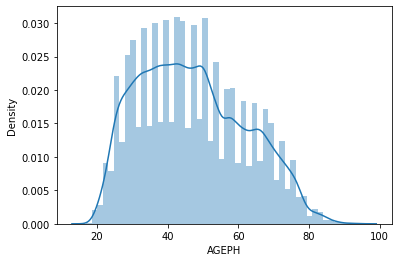

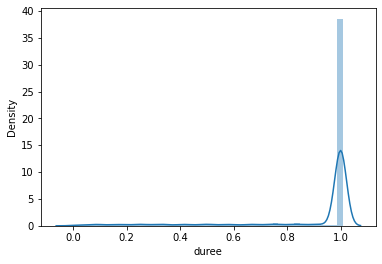

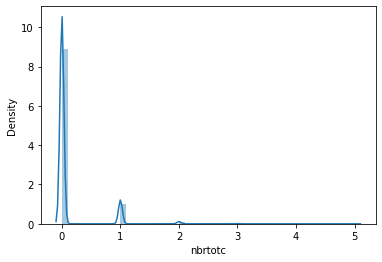

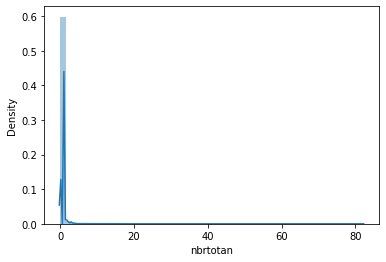

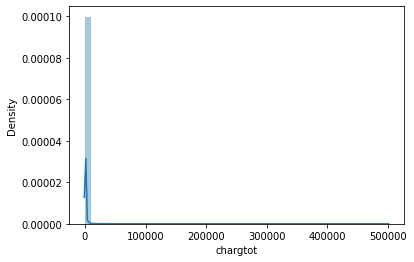

In [13]:
plot_univariate_numerical_variables_distribution(df, numerical_variables, params)

## 1.2 univariate analysis of categorical data

In [14]:
categorical_variables = list(df.select_dtypes(include=['object']).columns)
categorical_variables

['CODPOSS',
 'agecar',
 'sexp',
 'fuelc',
 'split',
 'usec',
 'fleetc',
 'sportc',
 'coverp',
 'powerc']

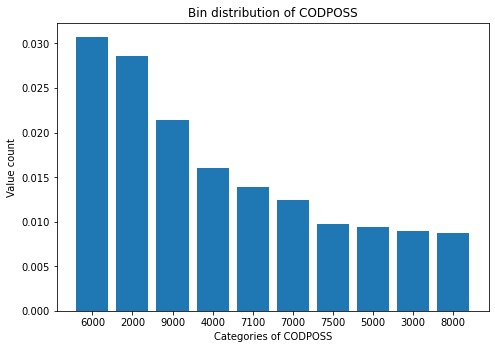

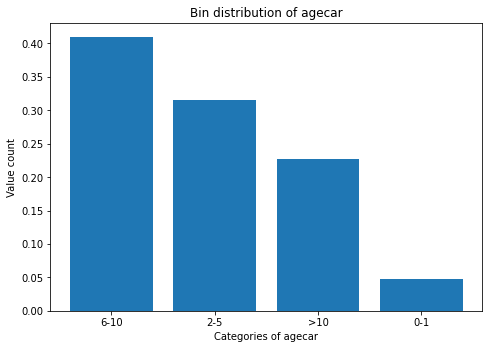

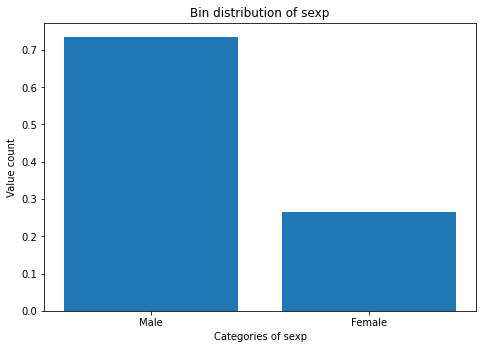

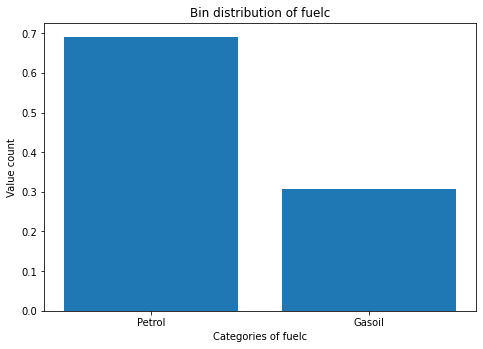

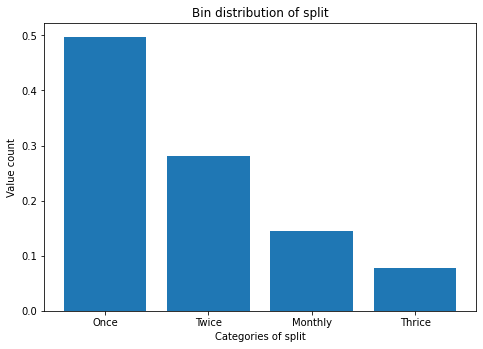

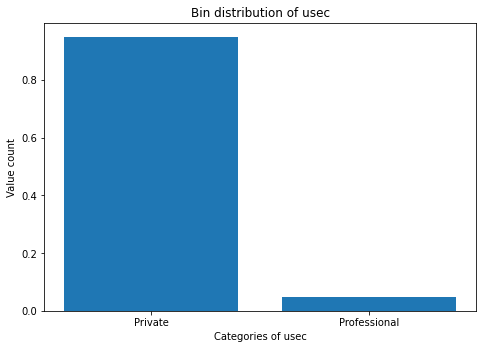

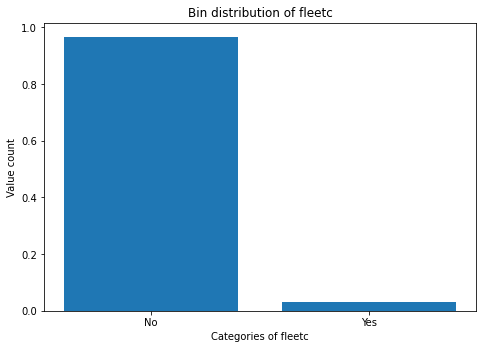

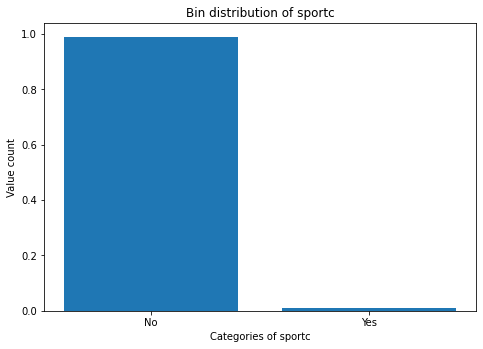

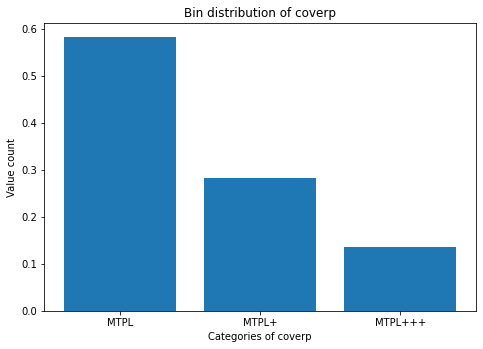

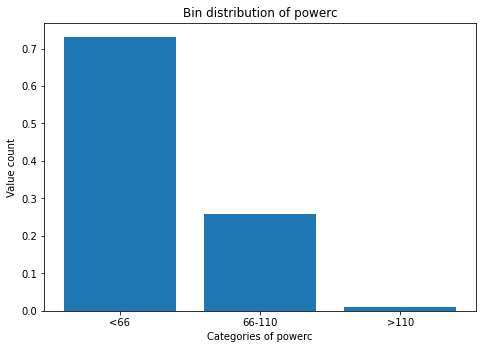

In [15]:
plot_univariate_categorical_variables_distribution(df, categorical_variables, params)

## 1.3 bivariate analysis of numerical data

In [18]:
nb_claims = params.get(Constants.NB_CLAIMS)

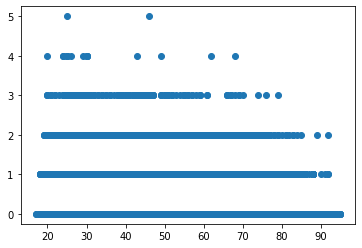

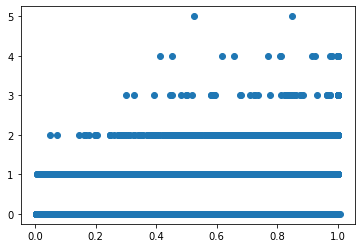

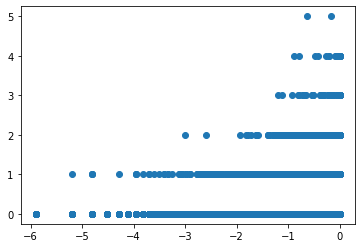

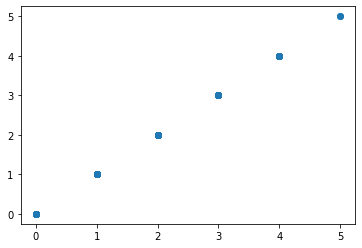

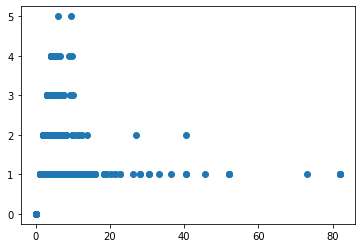

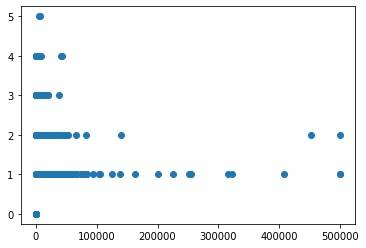

In [20]:
for num_var in numerical_variables:
    plt.scatter(df[num_var], df[nb_claims], )
    plt.show()
    plt.close()

## 1.4 bivariate analysis of categorical data

# 2. Feature Engineering

# 3. Modelling